<a href="https://colab.research.google.com/github/aldo44910-coder/Proyecto/blob/main/clubbpingui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Proyecto

Josue Zabdiel Sandoval Tinoco

Aldo Ivan Martinez Castro

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
penguins = pd.read_csv("/content/dataset/penguins (1).csv", index_col = 0)
penguins = penguins.iloc[0:6] # Selects rows from index 0 up to (but not including) 6
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [16]:
penguins.shape

(6, 8)

In [17]:
null_counts = penguins.isnull().sum()
null_counts

column_to_drop = null_counts.loc[null_counts > (0.03 * len(penguins))].index
data_cleaned = penguins.drop(columns = column_to_drop)

data_cleaned.shape

(6, 3)

In [18]:
numeric_columns = data_cleaned.select_dtypes(include=np.number).columns

for col in numeric_columns:
  data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

data_cleaned.isnull().sum()

/tmp/ipython-input-3661120686.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)


,0
species,0
island,0
year,0


In [19]:
# Cambiar las columnas categóricas
string_columns = data_cleaned.select_dtypes(include = ["object"]).columns

for col in string_columns:
  data_cleaned[col].fillna(data_cleaned[col].mode()[0],inplace = True)

data_cleaned.isnull().sum()

/tmp/ipython-input-3014885534.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna(data_cleaned[col].mode()[0],inplace = True)


,0
species,0
island,0
year,0


In [20]:
# Convertir columnas numéricas a int64
int_columns = ["year"]  # La columna 'year' es claramente entera

for col in int_columns:
    try:
        data_cleaned[col] = data_cleaned[col].astype("int64")
        print(f"✓ Columna '{col}' convertida a int64")
    except Exception as e:
        print(f"✗ Error convirtiendo '{col}': {e}")

print("\nTipos de datos finales:")
print(data_cleaned.dtypes)

✓ Columna 'year' convertida a int64

Tipos de datos finales:
species    object
island     object
year        int64
dtype: object


ANALISIS DESCRIPTIVO DE EL DATASET

In [21]:
# Seleccionar automáticamente todas las columnas numéricas
numeric_cols = data_cleaned.select_dtypes(include=["number"]).columns
print("Columnas numéricas:", numeric_cols.tolist())

descriptive_stats = data_cleaned[numeric_cols].describe()
median_stat = data_cleaned[numeric_cols].median()
descriptive_stats.loc["median"] = median_stat
descriptive_stats

Columnas numéricas: ['year']


,year
count,6.0
mean,2007.0
std,0.0
min,2007.0
25%,2007.0
50%,2007.0
75%,2007.0
max,2007.0
median,2007.0


In [22]:
# Filtra solo pingüinos Gentoo (la especie más grande)
top_penguins = data_cleaned.loc[data_cleaned["species"] == "Gentoo"]
top_penguins.shape

(0, 3)

UTILIZA EL DATAFRAME TOP_PENGUIS

In [23]:
import pandas as pd
import seaborn as sns

# Cargar el dataset completo de pingüinos desde seaborn
data_cleaned = sns.load_dataset("penguins")

# Verificar que tenemos las columnas correctas
print("Columnas:", data_cleaned.columns.tolist())
print("\nPrimeras filas:")
print(data_cleaned.head())

Columnas: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

Primeras filas:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


BAJA PROPORCION

In [24]:
# Filtrar pingüinos con longitud del pico menor a 40 mm
small_bill = penguins[penguins["bill_length_mm"] < 40]

# Calcular el número total de pingüinos por "species"
small_bill_summary = small_bill.groupby("species").size().reset_index(name="count")

small_bill_summary.head()

,species,count
0,Adelie,4


/tmp/ipython-input-187349994.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_data, x='species', y='body_mass_g', palette='viridis')


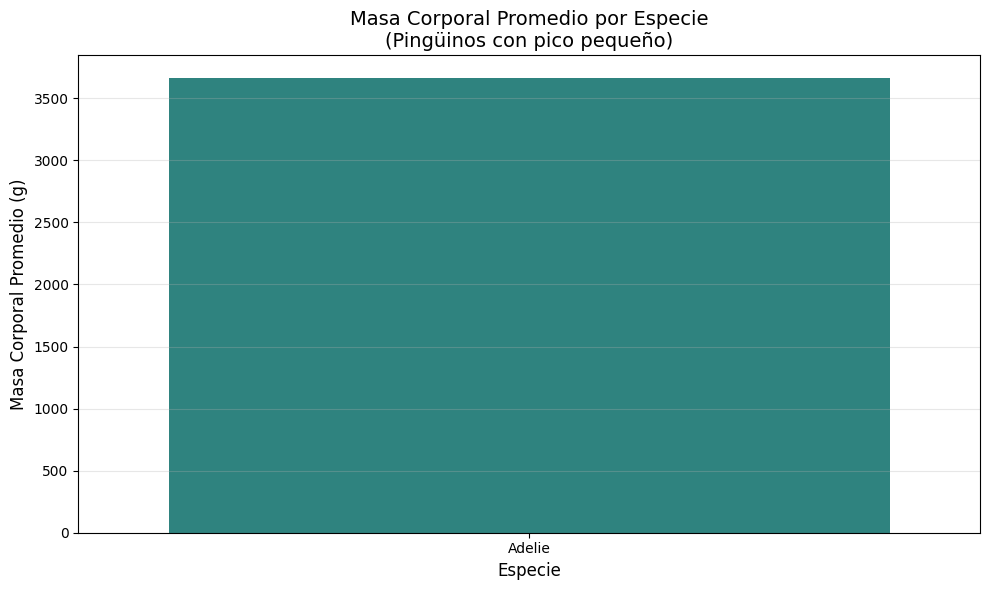

In [33]:
bar_data = small_bill.groupby("species").agg({"body_mass_g": "mean"}).reset_index()

plt.figure(figsize=(10, 6))
plt.title("Masa Corporal Promedio por Especie\n(Pingüinos con pico pequeño)", fontsize=14)
plt.xlabel("Especie", fontsize=12)
plt.ylabel("Masa Corporal Promedio (g)", fontsize=12)
plt.grid(True, alpha=0.3)

sns.barplot(data=bar_data, x="species", y="body_mass_g", palette="viridis")

plt.tight_layout()
plt.show()

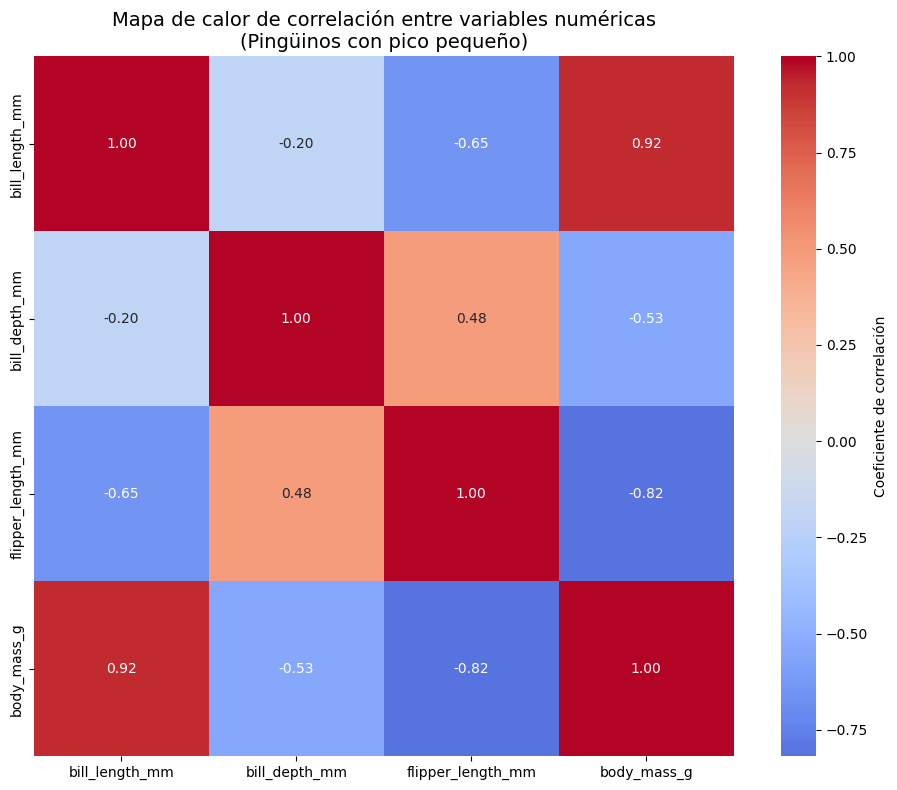

In [27]:
heatmap_data = small_bill[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

plt.figure(figsize=(10, 8))
plt.title('Mapa de calor de correlación entre variables numéricas\n(Pingüinos con pico pequeño)', fontsize=14)
sns.heatmap(heatmap_data,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            center=0,
            square=True,
            cbar_kws={'label': 'Coeficiente de correlación'})

plt.tight_layout()
plt.show()

In [29]:
species_mass = small_bill.groupby('species')['body_mass_g'].mean().reset_index()

top_species = species_mass.sort_values('body_mass_g', ascending=False).head(1)

top_species

,species,body_mass_g
0,Adelie,3662.5
